In [3]:
from sklearn.linear_model import LogisticRegressionCV
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

%cd "C:\Users\artemiyburov\prog\epidemic-datathon\"

C:\Users\artemiyburov\prog\epidemic-datathon


In [4]:
df = pd.read_csv("worldwide-aggregated.csv")
#df.plot(y='Confirmed', use_index = True)

x = df.index       #features
y = df['Confirmed']#labels
x_predicted = np.arange(150)

In [5]:
def logistic_function(x,A,x0,k,off):
    return A / (1 + np.exp(-k*(x-x0)))+off

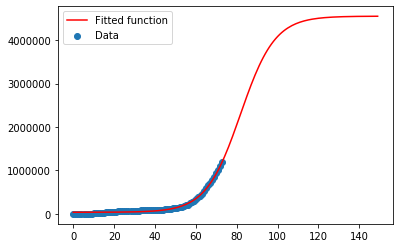

In [6]:
popt, pcov = curve_fit(logistic_function, x, y)
plt.scatter(x,y,label='Data')
plt.plot(x_predicted, logistic_function(x_predicted, *popt), 'r-',label='Fitted function')
plt.legend()

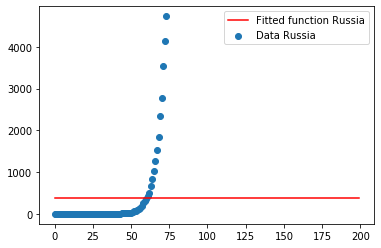

In [54]:
df_by_country = pd.read_csv("countries-aggregated.csv")
#df.loc[df_by_country["Country"] == "South Africa"]
for country in df_by_country.Country.unique():
    if country == 'Russia':
        df_country = df_by_country.loc[df_by_country["Country"] == country].reset_index()
        x = df_country.index       #features
        y = df_country['Confirmed']#labels
        x_predicted = np.arange(200)
        popt, pcov = curve_fit(logistic_function, x, y)
        plt.scatter(x,y,label='Data '+country)
        plt.plot(x_predicted, logistic_function(x_predicted, *popt), 'r-',label='Fitted function '+country)
plt.legend()